# SDGSat - Find Matching TIF-s

In [1]:
import geopandas as gpd
import pandas as pd
from dotenv import load_dotenv

from conflict_monitoring_ntl.satellites import SDGSat
from geopandas.geodataframe import GeoDataFrame

In [2]:
_ = load_dotenv()

## Finding Matching TIF-s

In [43]:
gdf: GeoDataFrame = gpd.read_file("../data/shapes/lagos/lagos.shp")
date_range = pd.date_range(start="2024-12-22", end="2024-12-25", freq="D").date.tolist()

In [6]:
# gdf: GeoDataFrame = gpd.read_file("../data/shapes/zurich/zurich.shp")
# date_range = [datetime(2022, 3, 21), datetime(2022, 3, 23)]

In [ ]:
gdf: GeoDataFrame = gpd.read_file("../data/shapes/sudan/sudan.shp")
date_range = pd.date_range(start="2023-12-10", end="2024-12-16", freq="D").date.tolist()

In [9]:
gdf: GeoDataFrame = gpd.read_file("../data/shapes/india/new_dehli.shp")
date_range = pd.date_range(start="2022-2-25", end="2022-2-28", freq="D").date.tolist()

In [10]:
sdgsat = SDGSat()
sdgsat_df = sdgsat.raster(gdf, date_range)

In [11]:
sdgsat_df

<xarray.Dataset> Size: 14MB
Dimensions:      (x: 2861, y: 2369, time: 1)
Coordinates:
  * x            (x) float64 23kB 6.985e+05 6.985e+05 ... 7.271e+05 7.271e+05
  * y            (y) float64 19kB 3.18e+06 3.18e+06 ... 3.157e+06 3.157e+06
  * time         (time) object 8B 2022-02-27
    spatial_ref  int64 8B 0
Data variables:
    HDR          (time, y, x) uint16 14MB 7 9 5 7 3 3 10 11 ... 2 3 1 1 2 2 1 1
Attributes:
    AREA_OR_POINT:             Area
    FOOTPRINT:                 POLYGON ((77.258934 26.455915, 78.832844 26.76...
    STATISTICS_APPROXIMATE:    YES
    STATISTICS_MAXIMUM:        2602
    STATISTICS_MEAN:           1.8093626577293
    STATISTICS_MINIMUM:        1
    STATISTICS_STDDEV:         8.9009570160917
    STATISTICS_VALID_PERCENT:  61.99
    _FillValue:                0
    scale_factor:              1.0
    add_offset:                0.0
    long_name:                 HDR

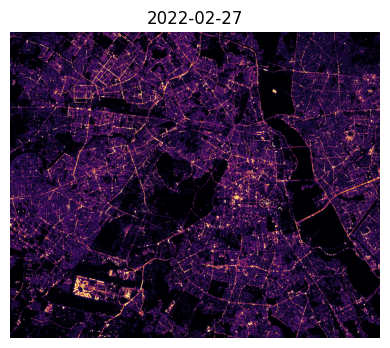

In [12]:
from conflict_monitoring_ntl.viz import plot_xarray_time_comparison


plot_xarray_time_comparison(sdgsat_df, "HDR")

In [54]:
sdgsat_patch = sdgsat_df["HDR"][0].to_numpy()

In [55]:
sdgsat_patch.max()

np.uint16(3643)

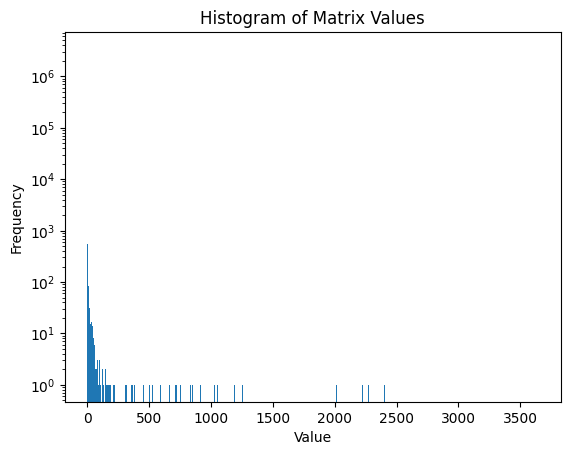

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming matrix is your 2D NumPy array
plt.hist(sdgsat_patch.ravel(), bins='auto')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Histogram of Matrix Values')
plt.show()

In [29]:
import numpy as np
patch = sdgsat_patch / np.nanmax(sdgsat_patch)

In [40]:
patch.max()

np.float64(1.0)

In [22]:
sdgsat_patch.shape

(1763, 1926)

(np.float64(-0.5), np.float64(1925.5), np.float64(1762.5), np.float64(-0.5))

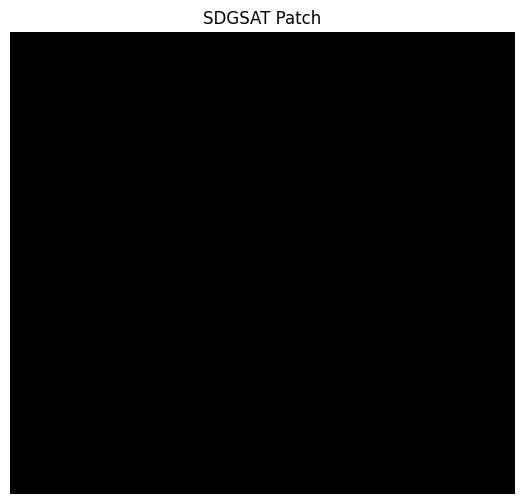

In [ ]:
# Plot
from matplotlib import pyplot as plt
import numpy as np

fig, (ax1) = plt.subplots(1, 1, figsize=(14, 6))

valid_vals = sdgsat_patch[sdgsat_patch > 0]
vmax = np.percentile(valid_vals, 99) if valid_vals.size > 0 else 1

ax1.imshow(sdgsat_patch, cmap="inferno", vmin=vmin, vmax=vmax)
ax1.set_title("SDGSAT Patch")
ax1.axis("off")